## Isolation Forest for Anomaly Detection
**Objective**: Understand and apply the Isolation Forest algorithm to identify anomalies in datasets.

### Task: Anomaly Detection in Financial Transactions
**Steps**:
1. Import Libraries
2. Load Dataset
3. Apply Isolation Forest
4. Visualize Anomalies

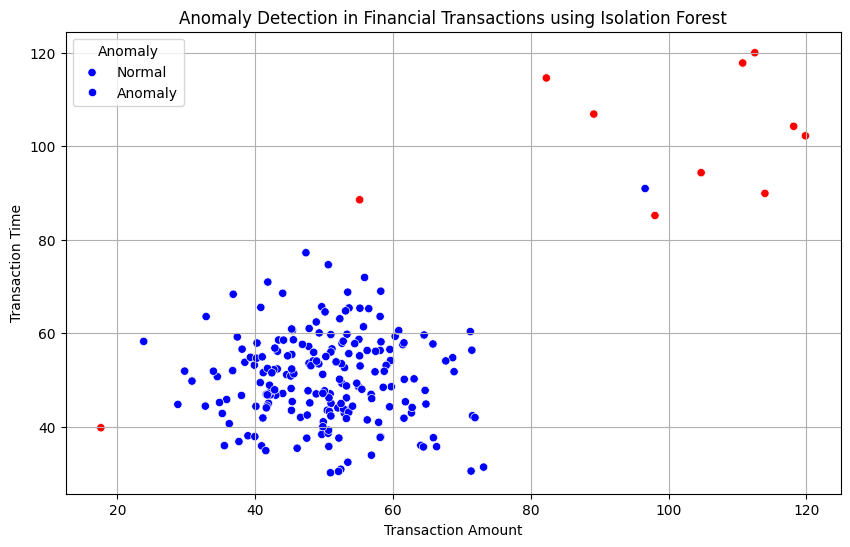

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import seaborn as sns

# Step 1: Import & Load Dataset
# Creating a mock financial transactions dataset
np.random.seed(42)
normal_data = np.random.normal(loc=50, scale=10, size=(200, 2))  # 200 normal transactions
anomalies = np.random.uniform(low=80, high=120, size=(10, 2))     # 10 anomalous transactions

data = np.vstack((normal_data, anomalies))
df = pd.DataFrame(data, columns=["transaction_amount", "transaction_time"])

# Step 2: Apply Isolation Forest
clf = IsolationForest(contamination=0.05, random_state=42)  # assuming 5% anomalies
df['anomaly'] = clf.fit_predict(df[["transaction_amount", "transaction_time"]])

# Step 3: Mark anomalies
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # 1 for anomaly

# Step 4: Visualize Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="transaction_amount", 
    y="transaction_time", 
    hue="anomaly", 
    palette={0: 'blue', 1: 'red'},
    data=df
)
plt.title("Anomaly Detection in Financial Transactions using Isolation Forest")
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Time")
plt.legend(title="Anomaly", labels=["Normal", "Anomaly"])
plt.grid(True)
plt.show()
